In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
temp_hist = np.load('temperature_history.npy')

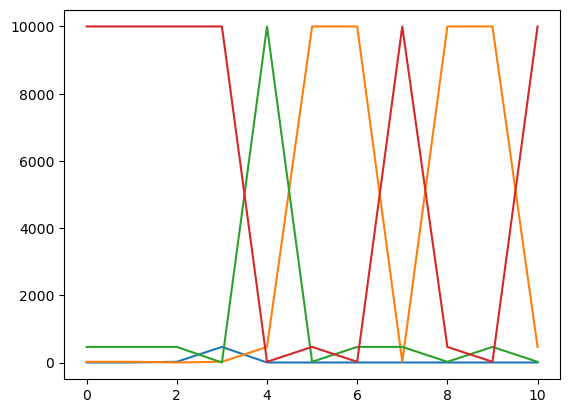

In [61]:
plt.plot(temp_hist[:, 0])
plt.plot(temp_hist[:, 1])
plt.plot(temp_hist[:, 2])
plt.plot(temp_hist[:, 3])
plt.show()

In [146]:
temp_hist = np.load('temp_rank0.npy')

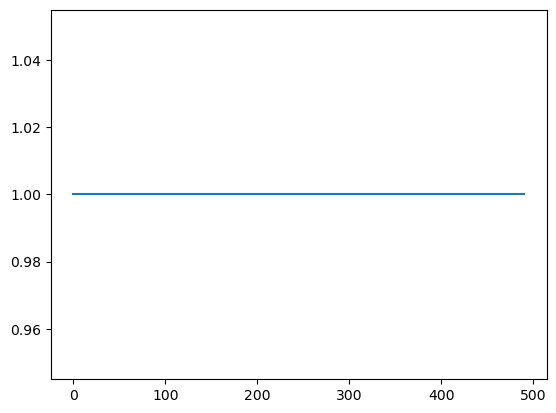

In [159]:
plt.plot(temp_hist[10:, 0])
#plt.plot(temp_hist[:, 1])
#plt.plot(temp_hist[:, 2])
#plt.plot(temp_hist[:, 3])
plt.show()

In [151]:
acceptance = np.load('acceptance.npy')

In [152]:
# Compute different order exchange 
order_exchange = []
order_exchange_mean = []
for order in range(10):
    if order == 0:
        order_exchange.append(np.diag(acceptance,order))
    else:
        exchange = np.diag(acceptance,order) / np.diag(acceptance,-order)
        exchange[np.argwhere(np.isnan(exchange))] = 0
        order_exchange.append(exchange)
    order_exchange_mean.append(order_exchange[-1].mean(axis=0))


# Check all elements in the diagonal are 0
assert order_exchange[0].all() == 0

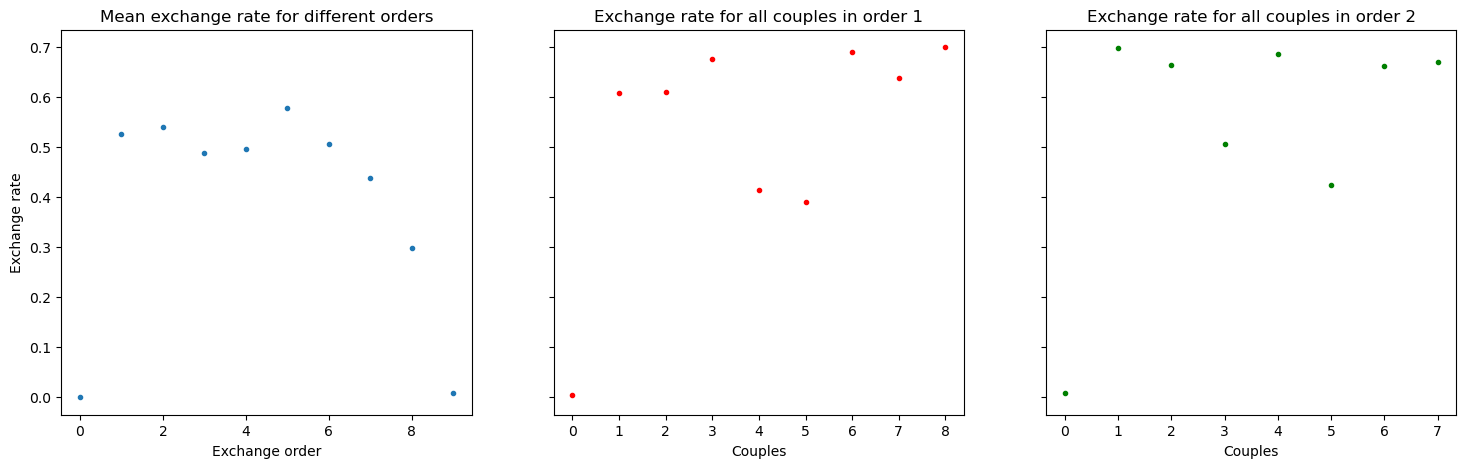

In [153]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharey=True)

ax[0].plot(order_exchange_mean, '.')
ax[0].set_title('Mean exchange rate for different orders')
ax[0].set_ylabel('Exchange rate')
ax[0].set_xlabel('Exchange order')

ax[1].plot(order_exchange[1], '.', c='r')
ax[1].set_title('Exchange rate for all couples in order 1')
ax[1].set_xlabel('Couples')


ax[2].plot(order_exchange[2], '.', c='g')
ax[2].set_title('Exchange rate for all couples in order 2')
ax[2].set_xlabel('Couples')


plt.show()

In [154]:
acceptance

array([[  0.,   1.,   2.,   0.,   1.,   0.,   1.,   1.,   0.,   2.],
       [235.,   0., 149., 179., 156., 143., 157., 176., 167., 163.],
       [261., 245.,   0., 166., 177., 106., 188., 186., 178., 162.],
       [262., 256., 272.,   0., 165., 128., 150., 168., 192., 167.],
       [224., 237., 266., 244.,   0.,  97., 182., 197., 163., 185.],
       [213., 260., 250., 253., 234.,   0.,  97., 102., 111., 117.],
       [290., 248., 285., 245., 265., 249.,   0., 185., 159., 150.],
       [250., 252., 251., 260., 305., 240., 268.,   0., 170., 205.],
       [249., 244., 262., 256., 232., 244., 240., 266.,   0., 189.],
       [262., 273., 258., 258., 240., 282., 238., 306., 270.,   0.]])

[]

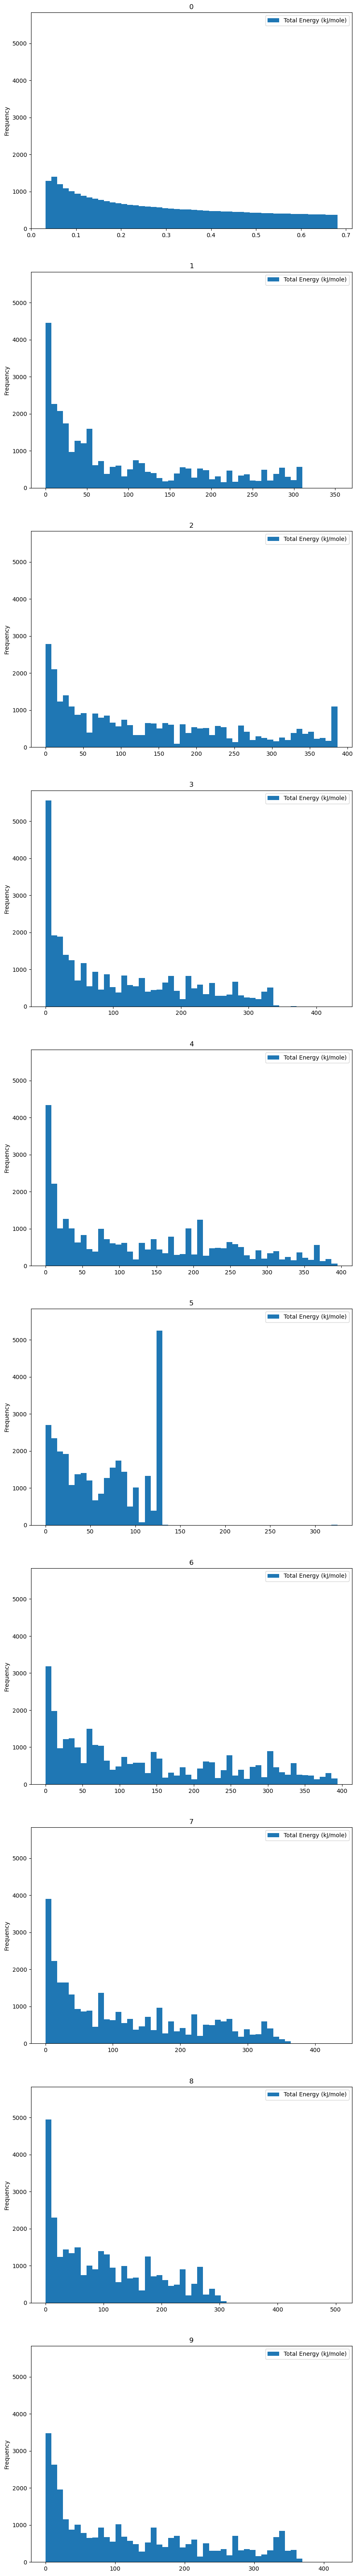

In [155]:
df = pd.read_csv(f'state.csv')
df.plot.hist(column=['Total Energy (kJ/mole)'], by='Number Replica', bins=50, figsize=(10,80), sharey=True)
#df.plot.hist(column=['Potential Energy (kJ/mole)'], by='Number Replica', figsize=(10,80), sharex=True, sharey=True)
plt.plot()